Resultados esperados:
 - input: 
    - avg_runtime
    - input_complexity
 - output: 
    - p_cores


In [2]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import fbeta_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [ ]:
df_train = pd.read_csv("dataset/train_data.csv")
df_test = pd.read_csv("dataset/test_data.csv")

In [ ]:
x_train = df_train[['input', 'average_runtime']]
y_train = df_train['cores']

x_test = df_test[['input', 'average_runtime']]
y_test = df_test['cores']

#### LSTM Model

In [ ]:
learning_rate = 0.001

model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(2, activation="relu", dropout=0.2, input_shape=(x_train.shape[1],1)))
model.add(tf.keras.layers.Dense(16))
model.add(tf.keras.layers.Dense(1))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
              loss="mse",
              metrics=['accuracy'])

model.summary()

history = model.fit(x_train, y_train, batch_size=1, epochs=30, verbose=2)

In [ ]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
# plot the training loss and accuracy
plt.style.use("ggplot")
fig, ax = plt.subplots(1,1,figsize=(10,8))

ax.plot(np.arange(0, 100), history.history["loss"], label="train_loss",linestyle='--')
ax.set_title("Training Loss and Accuracy")
ax.set_xlabel("Epoch #")
ax.legend()
plt.show()

#### MLP Regression Model

In [22]:
df_clean = pd.read_csv("dataset/clean_data.csv")
df_clean['cores'] = df_clean['cores']/df_clean['cores'].max()
df_clean['input'] = df_clean['input']/df_clean['input'].max()

In [23]:
X = df_clean[['input', 'average_runtime', 'speedup', 'efficiency']].values
y = df_clean['cores'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [26]:
learning_rate = 0.001
input_shape = (X_train.shape[1],)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape = input_shape))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', 
              loss='mean_squared_error')

history = model.fit(X_train, y_train, batch_size=32, epochs=500, verbose=2, validation_data=(X_test, y_test))

Epoch 1/500
7/7 - 1s - loss: 0.2628 - val_loss: 0.2775 - 1s/epoch - 158ms/step
Epoch 2/500
7/7 - 0s - loss: 0.2530 - val_loss: 0.2687 - 49ms/epoch - 7ms/step
Epoch 3/500
7/7 - 0s - loss: 0.2426 - val_loss: 0.2585 - 53ms/epoch - 8ms/step
Epoch 4/500
7/7 - 0s - loss: 0.2317 - val_loss: 0.2467 - 49ms/epoch - 7ms/step
Epoch 5/500
7/7 - 0s - loss: 0.2194 - val_loss: 0.2319 - 48ms/epoch - 7ms/step
Epoch 6/500
7/7 - 0s - loss: 0.2042 - val_loss: 0.2133 - 55ms/epoch - 8ms/step
Epoch 7/500
7/7 - 0s - loss: 0.1878 - val_loss: 0.1871 - 46ms/epoch - 7ms/step
Epoch 8/500
7/7 - 0s - loss: 0.1644 - val_loss: 0.1521 - 47ms/epoch - 7ms/step
Epoch 9/500
7/7 - 0s - loss: 0.1346 - val_loss: 0.1104 - 46ms/epoch - 7ms/step
Epoch 10/500
7/7 - 0s - loss: 0.1093 - val_loss: 0.0771 - 45ms/epoch - 6ms/step
Epoch 11/500
7/7 - 0s - loss: 0.0929 - val_loss: 0.0664 - 45ms/epoch - 6ms/step
Epoch 12/500
7/7 - 0s - loss: 0.0860 - val_loss: 0.0654 - 59ms/epoch - 8ms/step
Epoch 13/500
7/7 - 0s - loss: 0.0825 - val_loss: 

In [27]:
loss = model.evaluate(X_test, y_test)
print(f'Erro no conjunto de teste: {loss}')

predictions = model.predict(X_test)

for i in range(10):
    print(f'Valor Real: {y_test[i]}, Previsão: {predictions[i][0]}')

3/3 [==============================] - 0s 4ms/step - loss: 0.0050


Erro no conjunto de teste: 0.00495443120598793
3/3 [==============================] - 0s 2ms/step
Valor Real: 0.1875, Previsão: 0.15119503438472748
Valor Real: 0.90625, Previsão: 0.8512524962425232
Valor Real: 0.59375, Previsão: 0.6877058744430542
Valor Real: 0.71875, Previsão: 0.6598818898200989
Valor Real: 0.84375, Previsão: 0.8337254524230957
Valor Real: 0.1875, Previsão: 0.038774751126766205
Valor Real: 0.0625, Previsão: 0.041461676359176636
Valor Real: 0.03125, Previsão: 0.056184932589530945
Valor Real: 0.5625, Previsão: 0.5097824335098267
Valor Real: 0.96875, Previsão: 0.9012733101844788


#### MLP Classification Model

In [19]:
import keras
from keras import layers

data = pd.read_csv("dataset\clean_data.csv")

data['labels'] = data['cores'].max() - data['cores']
X = data[['input', 'average_runtime', 'speedup', 'efficiency']].values
y = data['labels'].values
X = (X - X.mean(axis=0)) / X.std(axis=0)  # Normalização Z-score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_classes = np.unique(y).size

a = y_train
y_train = to_categorical(y_train, num_classes, dtype='int8')
y_test = to_categorical(y_test, num_classes, dtype='int8')

model = keras.Sequential([
    layers.Input(shape=(4,)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.15),
    layers.Dense(num_classes, activation='softmax')
])

lr = 0.0001
optimizer = keras.optimizers.Adam(learning_rate=lr)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=300, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Acurácia no conjunto de teste: {test_acc * 100:.2f}%")

predictions = model(X_test)

Epoch 1/300
7/7 [==============================] - 2s 43ms/step - loss: 3.4799 - accuracy: 0.0147 - val_loss: 3.4445 - val_accuracy: 0.0192
Epoch 2/300
7/7 [==============================] - 0s 15ms/step - loss: 3.4806 - accuracy: 0.0147 - val_loss: 3.4433 - val_accuracy: 0.0385
Epoch 3/300
7/7 [==============================] - 0s 11ms/step - loss: 3.4663 - accuracy: 0.0196 - val_loss: 3.4420 - val_accuracy: 0.0577
Epoch 4/300
7/7 [==============================] - 0s 10ms/step - loss: 3.4679 - accuracy: 0.0392 - val_loss: 3.4408 - val_accuracy: 0.0577
Epoch 5/300
7/7 [==============================] - 0s 9ms/step - loss: 3.4735 - accuracy: 0.0098 - val_loss: 3.4394 - val_accuracy: 0.0577
Epoch 6/300
7/7 [==============================] - 0s 9ms/step - loss: 3.4598 - accuracy: 0.0245 - val_loss: 3.4382 - val_accuracy: 0.0577
Epoch 7/300
7/7 [==============================] - 0s 9ms/step - loss: 3.4636 - accuracy: 0.0392 - val_loss: 3.4369 - val_accuracy: 0.0385
Epoch 8/300
7/7 [======

Text(113.9222222222222, 0.5, 'predicted label')

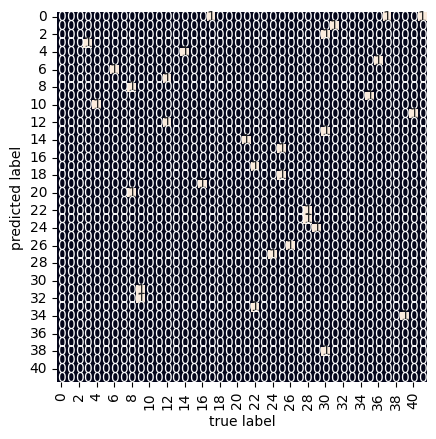

In [20]:
predictions=np.argmax(predictions, axis=0)
y_test=np.argmax(y_test, axis=0)

matrix=confusion_matrix(y_test, predictions)
sns.heatmap(matrix, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')